# Представление текста в формате one hot encoding для определения тональности отзывов на фильмы из IMDb (Internet Movie Database) 

Учебный курс "[Нейросети для анализа текстов](https://www.asozykin.ru/courses/nnpython)".

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Не забудьте подключить GPU, чтобы сеть обучалась быстрее (Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU).

## Набор данных IMDb movie review

[Набор данных IMDb movie review](https://ai.stanford.edu/~amaas/data/sentiment/) создан для задач определения тональности текста. Набор включает отзывы на фильмы с сайта [IMDb](https://www.imdb.com). Отзывы только явно положительные (оценка >= 7) или отрицательные (оценка <= 4), нейтральные отзывы в набор данных не включались.

Размер набора данных 50 тыс. отзывов:
- Набор данных для обучения - 25 тыс. отзывов
- Набор данных для тестирования - 25 тыс. отзывов

Количество положительных и отрицательных отзывов одинаковое.

Разметка набора данных:
- 0 - отзыв отрицательный
- 1 - отзыв положительный

С точки зрения машинного обучения это задача бинарной классификации.

Набор данных описан в статье: [Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011)](https://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf).

<img src="https://www.dropbox.com/s/grd17bkapocb92o/imdb_movie_reviews.png?dl=1" width="600">


In [0]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Загружаем данные

In [0]:
max_words=10000

In [0]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

17465344/17464789 [==============================] - 1s 0us/step


## Подготовка данных для обучения

In [0]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

Функция для кодирования one hot encoding

In [0]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [0]:
x_train = vectorize_sequences(x_train, max_words)
x_test = vectorize_sequences(x_test, max_words)

In [0]:
x_train[0][:50]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.])

In [0]:
len(x_train[0])

10000

In [0]:
y_train[0]

1

## Создание нейронной сети

In [0]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(max_words,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [0]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 2s 9ms/step - loss: 0.3339 - accuracy: 0.8583 - val_loss: 0.3018 - val_accuracy: 0.8792
Epoch 2/10
176/176 [==============================] - 1s 8ms/step - loss: 0.1659 - accuracy: 0.9372 - val_loss: 0.3006 - val_accuracy: 0.8852
Epoch 3/10
176/176 [==============================] - 1s 7ms/step - loss: 0.0893 - accuracy: 0.9680 - val_loss: 0.3647 - val_accuracy: 0.8828
Epoch 4/10
176/176 [==============================] - 1s 7ms/step - loss: 0.0297 - accuracy: 0.9915 - val_loss: 0.5028 - val_accuracy: 0.8792
Epoch 5/10
176/176 [==============================] - 1s 7ms/step - loss: 0.0050 - accuracy: 0.9991 - val_loss: 0.6342 - val_accuracy: 0.8848
Epoch 6/10
176/176 [==============================] - 1s 7ms/step - loss: 7.9336e-04 - accuracy: 1.0000 - val_loss: 0.7430 - val_accuracy: 0.8880
Epoch 7/10
176/176 [==============================] - 1s 8ms/step - loss: 3.2176e-04 - accuracy: 1.0000 - val_loss: 0.7929 - val_accuracy: 0.887

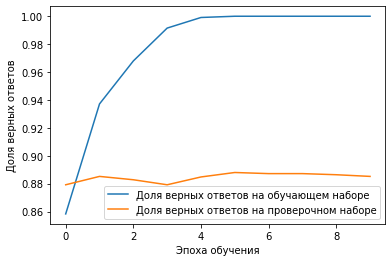

In [0]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Проверяем работу сети на тестовом наборе данных

In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 2s 2ms/step - loss: 0.9369 - accuracy: 0.8644


In [0]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 86.44
